Import libraries

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline

#### Read the pickles back in

In [97]:
davidson = gpd.read_file("../data/davidson_co.geojson")

In [2]:
may = pd.read_pickle("../data/may.pkl")
may.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,0
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,0


In [3]:
june = pd.read_pickle("../data/june.pkl")
june.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-06-01 00:00:12,36.1202,-86.7534,Powered93627c35-0f62-5b81-a78d-75a4a92ecf47,90.0,5
1,2019-06-01 00:00:12,36.1630,-86.7765,Powered17715097-e8a0-5494-a5ab-9b625796607d,63.0,5
2,2019-06-01 00:00:12,36.1202,-86.7533,Powerede5cb95ae-b091-5a93-86fa-ededd946d0d7,77.0,5
3,2019-06-01 00:00:12,36.1201,-86.7530,Powered71fa5e4f-1e17-54c4-936d-330df38cc2fa,0.0,5
4,2019-06-01 00:00:12,36.1622,-86.7806,Poweredfa549dd6-40bb-5757-ac87-2c2528f2bc68,2.0,5


In [4]:
july = pd.read_pickle("../data/july.pkl")
july.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-07-01 00:00:33.550,36.156678,-86.809004,Powered635135,22.0,1
1,2019-07-01 00:00:34.973,36.145674,-86.794138,Powered790946,33.0,1
2,2019-07-01 00:00:41.183,36.179319,-86.751538,Powered570380,76.0,1
3,2019-07-01 00:00:41.620,36.152111,-86.803821,Powered240631,43.0,1
4,2019-07-01 00:00:45.087,36.149355,-86.797550,Powered970404,52.0,1


#### Put the company names back in

In [5]:
company_dict = {0:'Bird', 1:'Lyft', 2: 'Gotcha', 3:'Lime', 4: 'Spin', 5: 'Jump', 6: 'Bolt'}
may.companyname = may.companyname.replace(company_dict)
june.companyname = june.companyname.replace(company_dict)
july.companyname = july.companyname.replace(company_dict)

#### Get info on each file

In [6]:
may.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20283582 entries, 0 to 20292502
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   chargelevel  float64       
 5   companyname  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.1+ GB


In [7]:
june.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28037408 entries, 0 to 28046094
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   chargelevel  float64       
 5   companyname  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.5+ GB


In [8]:
july.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25066524 entries, 0 to 25075444
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   chargelevel  float64       
 5   companyname  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.3+ GB


#### Get overview of null values in each file

In [9]:
may.isnull().sum()

pubdatetime      0
latitude         0
longitude        0
sumdid           0
chargelevel    283
companyname      0
dtype: int64

In [10]:
june.isnull().sum()

pubdatetime      0
latitude         0
longitude        0
sumdid           0
chargelevel    285
companyname      0
dtype: int64

In [11]:
july.isnull().sum()

pubdatetime      0
latitude         0
longitude        0
sumdid           0
chargelevel    202
companyname      0
dtype: int64

#### Get the value counts for each file

In [12]:
may.companyname.value_counts()

Lime      7111655
Bird      4334006
Lyft      3112581
Jump      2984630
Spin      1301001
Gotcha     915314
Bolt       524395
Name: companyname, dtype: int64

In [13]:
june.companyname.value_counts()

Jump      8482893
Lime      6152504
Bird      4215302
Lyft      3084229
Spin      2507991
Gotcha    1830453
Bolt      1764036
Name: companyname, dtype: int64

In [14]:
july.companyname.value_counts()

Jump      10367575
Bird       3702282
Lime       3233573
Lyft       2890233
Gotcha     1933513
Spin       1750581
Bolt       1188767
Name: companyname, dtype: int64

Index(['companyname'], dtype='object')


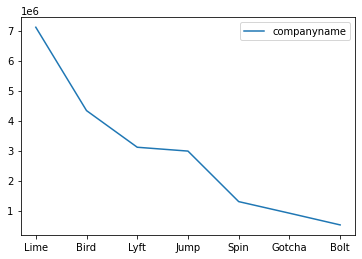

In [15]:
may_cn_vals = may.companyname.value_counts()
may_cn_vals = pd.DataFrame(may_cn_vals)
print(may_cn_vals.columns)
may_cn_vals.sort_values("companyname")
may_cn_vals.plot();

Index(['companyname'], dtype='object')


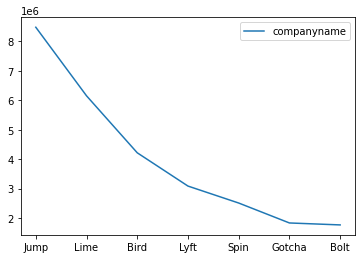

In [16]:
june_cn_vals = june.companyname.value_counts()
june_cn_vals = pd.DataFrame(june_cn_vals)
print(june_cn_vals.columns)
june_cn_vals.sort_values("companyname")
june_cn_vals.plot();

Index(['companyname'], dtype='object')


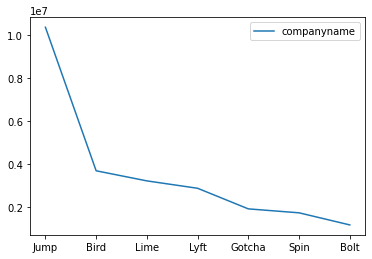

In [17]:
july_cn_vals = july.companyname.value_counts()
july_cn_vals = pd.DataFrame(july_cn_vals)
print(july_cn_vals.columns)
july_cn_vals.sort_values("companyname")
july_cn_vals.plot();

#### Show the number of unique scooters each month

In [18]:
may_n_scooters = int(may.sumdid.nunique())
may_n_scooters

8303

In [19]:
june_n_scooters = int(june.sumdid.nunique())
june_n_scooters

7822

In [20]:
july_n_scooters = int(july.sumdid.nunique())
july_n_scooters

6787

#### Find the mean data for charge levels

In [21]:
may.chargelevel.mean()

65.90530320388218

In [22]:
june.chargelevel.mean()

58.30081921850534

In [23]:
july.chargelevel.mean()

51.51018639711071

#### Charge levels by Company

Text(0.5, 1.0, 'Companies and Charge Levels in May')

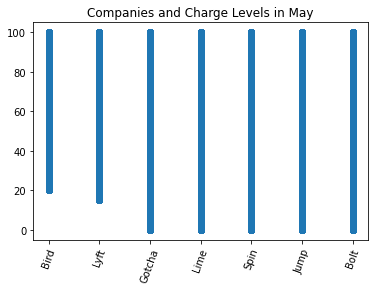

In [24]:
plt.plot('companyname', 'chargelevel', marker= 'o', linestyle='none', data=may)
plt.xticks(rotation=70)
plt.title("Companies and Charge Levels in May")

Text(0.5, 1.0, 'Companies and Charge Levels in June')

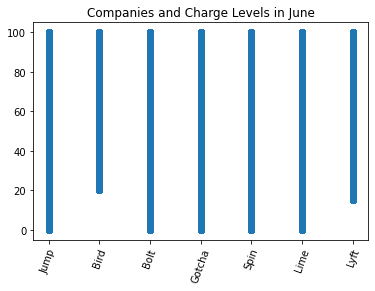

In [25]:
plt.plot('companyname', 'chargelevel', marker= 'o', linestyle='none', data=june)
plt.xticks(rotation=70)
plt.title("Companies and Charge Levels in June")

Text(0.5, 1.0, 'Companies and Charge Levels in July')

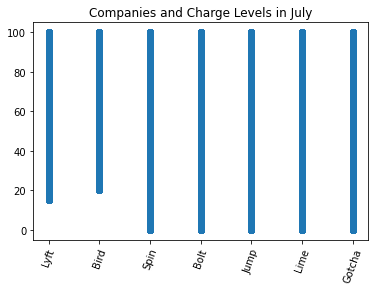

In [26]:
plt.plot('companyname', 'chargelevel', marker= 'o', linestyle='none', data=july)
plt.xticks(rotation=70)
plt.title("Companies and Charge Levels in July")

#### Show the charge level for 

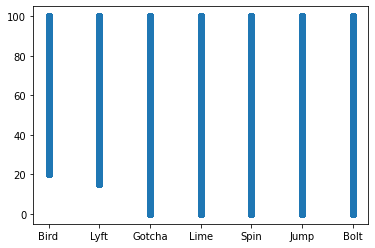

In [27]:
plt.scatter('companyname', 'chargelevel', data=may)

#### Create a df that will let us grab May's locations by time of day

In [28]:
may_avg_charge = may[['companyname', 'chargelevel', 'pubdatetime', 'sumdid']]
may_avg_charge.sort_values(by=['pubdatetime','sumdid'])
may_avg_charge.groupby(by=['pubdatetime', 'sumdid'])
may_avg_charge

,companyname,chargelevel,pubdatetime,sumdid
0,Bird,93.0,2019-05-01 00:01:41.247,PoweredLIRL1
1,Bird,35.0,2019-05-01 00:01:41.247,PoweredXWRWC
2,Bird,90.0,2019-05-01 00:01:41.247,PoweredMEJEH
3,Bird,88.0,2019-05-01 00:01:41.247,Powered1A7TC
4,Bird,98.0,2019-05-01 00:01:41.247,Powered2TYEF
...,...,...,...,...
20292498,Jump,49.0,2019-05-31 23:59:42.000,Poweredbb60ef04-c719-597f-805f-20978964fd8c
20292499,Jump,68.0,2019-05-31 23:59:42.000,Powered9f5743ed-7f81-539b-9e37-6503d54445d3
20292500,Jump,53.0,2019-05-31 23:59:42.000,Powered5744d1db-3bbe-55e5-9a23-a93828ba54fc
20292501,Jump,42.0,2019-05-31 23:59:42.000,Poweredad1d6d3b-162a-5bec-bffd-cac4ac8dee1c


#### Make variables for sectors of the day - morning, midday, afternoon, evening.

##### I may want to create a df for each day with each individual scooter and then the column headers are those sectors of the day, while their contents contain their lat/lng along with their charge level.

In [29]:
# morning = # 6-9:30am
# midday = # 9:30am-11:00am
# lunchtime = # 11:00am-1:00pm
# afternoon = # 1:00pm-4:00pm
# evening = # 4:00pm - 7:00pm
# night = # 7:00pm - 11:59pm

#### Create a list of the days

In [30]:
month_lengths = {'January':31, 'February':28, 'March':31, 'April':30, 'May':31, 'June':30, 'July':31, 'August':31, 'September':30, 'October':31, 'November':30, 'December':31}
month_number = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

#### Create a function to grab each day's sets of coordinates

In [31]:
months_dict = {}
def day_df(df, month):
    dict1 = {}
    for i in range(1,month_lengths[month]):  
        start_date = f"2019-{month_number[month]}-{str(i)}"
        end_date = f"2019-{month_number[month]}-{str(i+1)}"
        mask = (df['pubdatetime'] > start_date) & (df['pubdatetime'] <= end_date)
        day = df.loc[mask]
        dict1[i] = day
        months_dict[i] = dict1[i]
    return dict1

In [32]:
# may['geometry'] = gpd.points_from_xy(may.Longitude, may.Latitude)

for each chunk of 10 or so, geoplot the coords of each scooter and its time.

for each unique sumdid, create dict of coord:time for that day. This should be one column unto itself

In [33]:
may_uniq_scooters = may.sumdid.unique().tolist()
may_time_coord_dict = {}
may_uniq_scooters

['PoweredLIRL1',
 'PoweredXWRWC',
 'PoweredMEJEH',
 'Powered1A7TC',
 'Powered2TYEF',
 'Powered3F3VK',
 'PoweredVL7YG',
 'Powered5LNUG',
 'Powered7SPQQ',
 'PoweredBV1DT',
 'Powered3B46L',
 'Powered7S2UU',
 'PoweredA64US',
 'PoweredGK9VY',
 'PoweredBFCXJ',
 'PoweredAB4VX',
 'PoweredNPV1Q',
 'PoweredXWRSD',
 'Powered2ZSZE',
 'PoweredI4EEE',
 'PoweredY43Q4',
 'PoweredRWGRR',
 'PoweredASJRY',
 'Powered12J9T',
 'PoweredA9W92',
 'Powered38GUR',
 'PoweredMA1E2',
 'PoweredXFQ22',
 'PoweredVZU3B',
 'PoweredLP7V8',
 'Powered4P19Z',
 'PoweredBE3BS',
 'PoweredV33KI',
 'PoweredKUV1U',
 'Powered4BES8',
 'PoweredS3C46',
 'PoweredRAQAI',
 'PoweredBF8XE',
 'PoweredDNCQL',
 'PoweredK6YH7',
 'PoweredINP6E',
 'Powered71SLY',
 'PoweredC4JMV',
 'Powered125HI',
 'PoweredFZIK5',
 'Powered9DC3R',
 'PoweredAPID7',
 'Powered57MTR',
 'Powered3WW12',
 'PoweredDVQDU',
 'PoweredLSSUT',
 'Powered9JD8Y',
 'PoweredE483T',
 'PoweredJG9NA',
 'PoweredZB1FI',
 'PoweredRDZAZ',
 'PoweredNHD1X',
 'PoweredH1XZK',
 'PoweredBWUNW

In [34]:
may.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,Bird
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,Bird
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,Bird
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,Bird
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,Bird


### Master Function to Rule Them All

{sumdid: {companyname: Bird, route: {pubdatetime: {geometry: -86.799877\n1 -86.772945\n.., chargelevel: 93.0}}}}

In [35]:
def scooter_daily_rt(df, month, day):
    dict1 = {}
    start_date = f"2019-{month_number[month]}-{str(day)}"
    end_date = f"2019-{month_number[month]}-{str(day+1)}"
    mask = (df['pubdatetime'] > start_date) & (df['pubdatetime'] <= end_date)
    day_msk = df.loc[mask]
    return day_msk

may_1_rdm = may[may.sumdid=="PoweredLIRL1"]
rando_scooter_rt = scooter_daily_rt(may_1_rdm, "May", 1)
rando_scooter_rt

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,Bird
2694,2019-05-01 00:06:41.537,36.136822,-86.799877,PoweredLIRL1,93.0,Bird
26176,2019-05-01 01:01:43.917,36.136751,-86.799921,PoweredLIRL1,92.0,Bird
28812,2019-05-01 01:06:44.237,36.136751,-86.799921,PoweredLIRL1,92.0,Bird
30726,2019-05-01 01:11:44.167,36.136751,-86.799921,PoweredLIRL1,92.0,Bird
...,...,...,...,...,...,...
188435,2019-05-01 08:37:01.067,36.136832,-86.799858,PoweredLIRL1,92.0,Bird
190128,2019-05-01 08:42:00.967,36.136832,-86.799858,PoweredLIRL1,92.0,Bird
191629,2019-05-01 08:47:01.023,36.136838,-86.799834,PoweredLIRL1,92.0,Bird
193851,2019-05-01 08:52:01.247,36.136838,-86.799834,PoweredLIRL1,92.0,Bird


<AxesSubplot:>

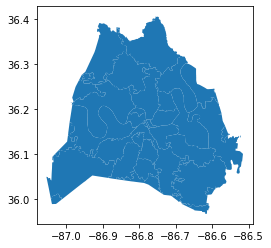

In [46]:
# Reading in the zip codes
zipfilepath = '../data/zipcodes.geojson'
zips = gpd.read_file(zipfilepath)
zips.plot()

In [45]:
# Reading in promise zones
promise_zones = gpd.read_file('../data/MDHA_Promise_Zones/Export_Output_5.shp')
print(promise_zones.crs)
promise_zones= promise_zones.to_crs('EPSG:4326')
print(promise_zones)

epsg:2274
   OBJECTID  ZONE_ID    SHAPE_STAr     SHAPE_STLe  \
0         1        1  1.053728e+08   49364.601403   
1         2        2  7.670585e+07   45226.018917   
2         3        3  2.985488e+08   75207.067487   
3         4        4  2.713638e+08   74348.596054   
4         5        5  3.928178e+08  106661.712102   
5         6        6  9.535996e+07   59256.923574   

                                            geometry  
0  POLYGON ((-86.76297 36.19364, -86.76297 36.193...  
1  POLYGON ((-86.77838 36.14889, -86.77823 36.148...  
2  POLYGON ((-86.70771 36.16723, -86.70758 36.166...  
3  POLYGON ((-86.74735 36.13036, -86.74728 36.130...  
4  POLYGON ((-86.78490 36.23358, -86.78452 36.232...  
5  POLYGON ((-86.85223 36.16417, -86.85204 36.164...  


<AxesSubplot:>

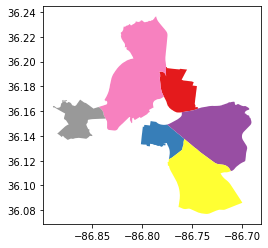

In [38]:
promise_zones.plot(cmap='Set1')

In [55]:
rando_scooter_rt.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,geometry
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,Bird,POINT (-86.79988 36.13682)
2694,2019-05-01 00:06:41.537,36.136822,-86.799877,PoweredLIRL1,93.0,Bird,POINT (-86.79988 36.13682)
26176,2019-05-01 01:01:43.917,36.136751,-86.799921,PoweredLIRL1,92.0,Bird,POINT (-86.79992 36.13675)
28812,2019-05-01 01:06:44.237,36.136751,-86.799921,PoweredLIRL1,92.0,Bird,POINT (-86.79992 36.13675)
30726,2019-05-01 01:11:44.167,36.136751,-86.799921,PoweredLIRL1,92.0,Bird,POINT (-86.79992 36.13675)


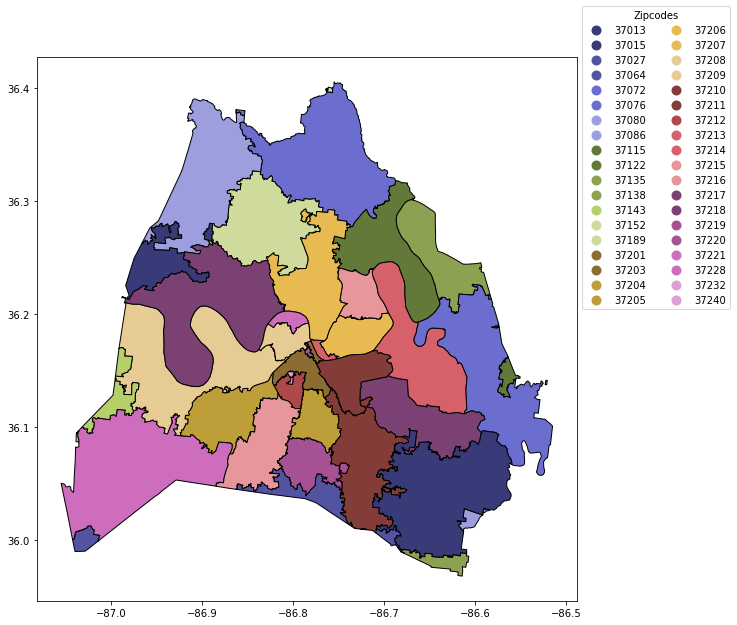

In [48]:
scooter_day_gdf = gpd.GeoDataFrame(rando_scooter_rt, crs=zips.crs, geometry=gpd.points_from_xy(rando_scooter_rt.longitude, rando_scooter_rt.latitude))
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 'bbox_to_anchor': (1, 1.103), 'ncol':2}
zips.plot(column='zip', figsize=(10,10), edgecolor='black', legend=True, legend_kwds=leg_kwds, cmap='tab20b')
scooter_zips = gpd.sjoin(scooter_day_gdf, zips, op='within')
plt.show()

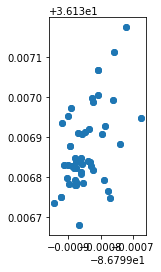

In [49]:
scooter_zips.plot()
plt.show()

In [50]:
scooter_checkins = scooter_zips['pubdatetime'].value_counts()
scooter_checkins

2019-05-01 00:01:41.247    1
2019-05-01 06:56:57.310    1
2019-05-01 06:46:57.133    1
2019-05-01 06:41:57.030    1
2019-05-01 06:36:56.893    1
                          ..
2019-05-01 03:21:49.280    1
2019-05-01 03:16:49.280    1
2019-05-01 03:11:48.900    1
2019-05-01 03:06:48.633    1
2019-05-01 08:57:01.397    1
Name: pubdatetime, Length: 98, dtype: int64

In [82]:
stops_in_37212 = zips.loc[zips['zip'] == '37212']
scooter_zips.geometry.to_crs(epsg='4326')

0         POINT (-86.79988 36.13682)
2694      POINT (-86.79988 36.13682)
26176     POINT (-86.79992 36.13675)
28812     POINT (-86.79992 36.13675)
30726     POINT (-86.79992 36.13675)
                     ...            
188435    POINT (-86.79986 36.13683)
190128    POINT (-86.79986 36.13683)
191629    POINT (-86.79983 36.13684)
193851    POINT (-86.79983 36.13684)
195224    POINT (-86.79986 36.13681)
Name: geometry, Length: 98, dtype: geometry

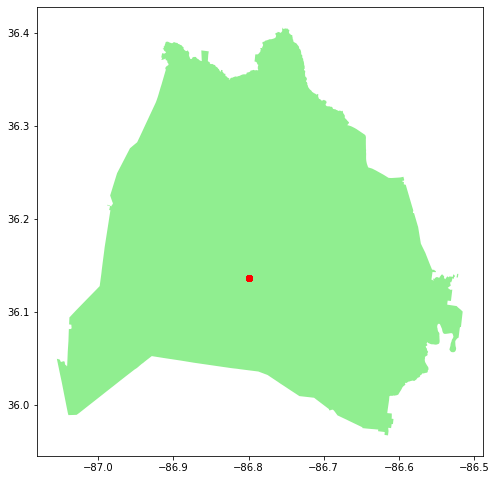

In [116]:
ax = davidson.plot(figsize=(8,10), color='lightgreen')
scooter_day_gdf.plot(ax=ax, color='red')
plt.show()

In [117]:
import folium

In [131]:
scooter_zips.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,geometry,index_right,zip,objectid,po_name,shape_stlength,shape_starea
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,Bird,POINT (-86.79988 36.13682),9,37212,54,NASHVILLE,58759.243654332378,73920091.147705078
2694,2019-05-01 00:06:41.537,36.136822,-86.799877,PoweredLIRL1,93.0,Bird,POINT (-86.79988 36.13682),9,37212,54,NASHVILLE,58759.243654332378,73920091.147705078
26176,2019-05-01 01:01:43.917,36.136751,-86.799921,PoweredLIRL1,92.0,Bird,POINT (-86.79992 36.13675),9,37212,54,NASHVILLE,58759.243654332378,73920091.147705078
28812,2019-05-01 01:06:44.237,36.136751,-86.799921,PoweredLIRL1,92.0,Bird,POINT (-86.79992 36.13675),9,37212,54,NASHVILLE,58759.243654332378,73920091.147705078
30726,2019-05-01 01:11:44.167,36.136751,-86.799921,PoweredLIRL1,92.0,Bird,POINT (-86.79992 36.13675),9,37212,54,NASHVILLE,58759.243654332378,73920091.147705078


In [119]:
davidson = davidson.to_crs(epsg='4326')
davidson.iloc[0]

area_sq_mi                                                  525
objectid                                                      4
shape_area                                        14641027913.6
shape_len                                         686109.334953
geometry      (POLYGON ((-86.52703726692877 36.1359765468729...
Name: 0, dtype: object

In [121]:
# center = davidson.iloc[0].geometry.centroid
# area_center = [center.y, center.x]
area_center = [36.163, -86.782]
map_zips_scooters = folium.Map(location = area_center, zoom_start=14)
map_zips_scooters

In [126]:
folium.GeoJson(davidson.geometry.iloc[0]).add_to(map_zips_scooters)

In [134]:
for row_index, row_values in scooter_zips.iterrows():
    loc = [row_values['latitude'], row_values['longitude']]
    pop = str(row_values['pubdatetime'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(scooter_zips)
map_rando_scooter.save('../maps/map_rando_scooter.html')

#display our map
map_rando_scooter

AttributeError: 'GeoDataFrame' object has no attribute 'add_child'

In [ ]:
months = {"May": may, "June": may, "July": july}
for key, value in months:
    day_df(value, key)
    for scooter in may_uniq_scooters:
        for row in value.loc[value['sumdid'] == scooter, :]:
            time = months_dict["pubdatetime"] ########################Get this to yield the correct thing from months_dict
            geo = may1_2['geometry']
            may_time_coord_dict[time] = geo
        print(may_time_coord_dict)

In [ ]:
months_dict

may_scooter_master = {scooter: {day1: {time:coord}}}

#### Create a GeoDataFrame from the day

In [ ]:
# may_gdf = gpd.GeoDataFrame(may, geometry=gpd.points_from_xy(may.longitude, may.latitude))
# may_gdf.head()
# type(may_gdf)